In [4]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [5]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('1', '1', '9', '0', '0', '1', '0', '1')

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ A $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [6]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *


In [7]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics,
                    lmc=10,
                    lem=200
                   )


In [8]:
agent = XNCS(cfg)
explore_population, explore_metrics =\
    agent.explore(maze, 3000, True)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [2.8566112218933495e-40, 8.400832354756411e-40, 3.0089755020947694e-40, 5.373945905528416e-40, 1.331157464532907e-39, 7.2462590953615124e-40, 1.2413732752587846e-39, 8.502887850913455e-40], 'numerosity': 74, 'population': 62, 'average_specificity': 2.324324324324324, 'fraction_accuracy': 0.09002976190476192}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 4, 'reward': [19.04115636378121, 282.52017309674295, 226.5067539676668, 8.421850892652117, 5.431990731337813, 15.731977597089834, 11.963625607846652, 14.502821779440746], 'numerosity': 366, 'population': 206, 'average_specificity': 1.7978142076502732, 'fraction_accuracy': 0.00012562392327923093}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 3, 'reward': [9.141033961819875, 503.015057902867, 8.863140156841938, 9.473248851504252, 10.954050664477583, 5.113548666757833, 10.610099188209634, 6.427631106549245], 'numerosity': 376, 'population': 207, 'average_s

In [9]:
for cl in explore_population:
    print(str(cl))

Cond:00#000## - Act:0 - Num:3 [fit: 0.000, exp: 769.00, pred: 362.000]
Cond:001##001 - Act:1 - Num:2 [fit: 0.000, exp: 299.00, pred: 735.269]
Cond:0010#001 - Act:2 - Num:1 [fit: 0.000, exp: 153.00, pred: 273.097]
Cond:0#100001 - Act:3 - Num:3 [fit: 0.006, exp: 21.00, pred: 209.456]
Cond:001000#1 - Act:4 - Num:3 [fit: 0.000, exp: 65.00, pred: 253.011]
Cond:00100#01 - Act:5 - Num:1 [fit: 0.004, exp: 156.00, pred: 279.322]
Cond:10100001 - Act:6 - Num:2 [fit: 0.244, exp: 3.00, pred: 6.916]
Cond:00100001 - Act:7 - Num:1 [fit: 0.001, exp: 82.00, pred: 273.815]
Cond:0#01#01# - Act:0 - Num:3 [fit: 0.000, exp: 814.00, pred: 428.572]
Cond:#9010010 - Act:1 - Num:3 [fit: 0.000, exp: 2354.00, pred: 541.384]
Cond:09010010 - Act:2 - Num:1 [fit: 0.000, exp: 235.00, pred: 247.591]
Cond:09010010 - Act:3 - Num:3 [fit: 0.000, exp: 56.00, pred: 306.198]
Cond:#9010010 - Act:4 - Num:3 [fit: 0.000, exp: 94.00, pred: 300.504]
Cond:09##001# - Act:5 - Num:3 [fit: 0.000, exp: 59.00, pred: 371.361]
Cond:#9#10010 -

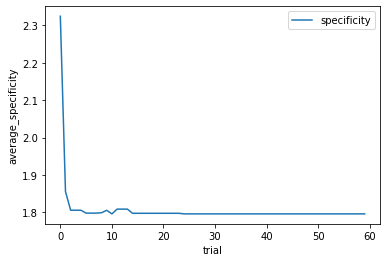

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


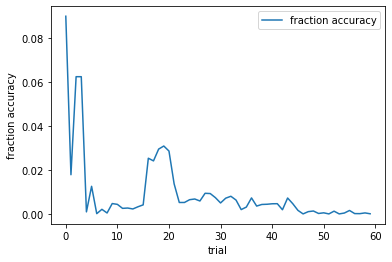

In [11]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])


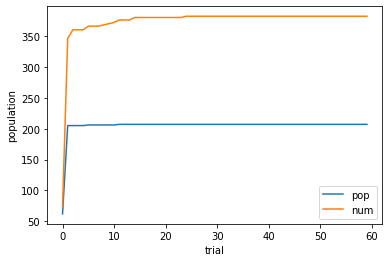

In [12]:

df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []


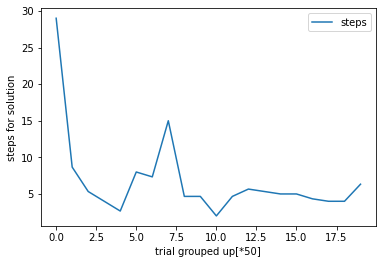

In [13]:


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
